In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
Virtual memory usage - total: 31 GB / available: 23 GB / percent used: 23.8 %


In [3]:
path = '/mnt/lalandmi/equipes/C2H/ESA_CCI_SNOW/preprocess/scfg/AVHRR_MERGED/v2.0/monthly'

In [4]:
# For parallelisation
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=1, memory_limit='4GB')
client

Client Scheduler: tcp://127.0.0.1:36303 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.00 GB


In [24]:
client.close()

In [5]:
ds = xr.open_mfdataset(path+'/*.nc', parallel=True)
ds = ds.reindex(time=pd.date_range(ds.time[0].values, ds.time[-1].values, freq='M'))
ds

,Array,Chunk
Bytes,92.07 GB,2.70 GB
Shape,"(444, 3600, 7200)","(13, 3600, 7200)"
Count,375 Tasks,37 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,92.07 GB,2.70 GB
Shape,"(444, 3600, 7200)","(13, 3600, 7200)"
Count,375 Tasks,37 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


# /!\ Penser à rajouter 0 pour la période de 1994-11 à 1995-01 /!\

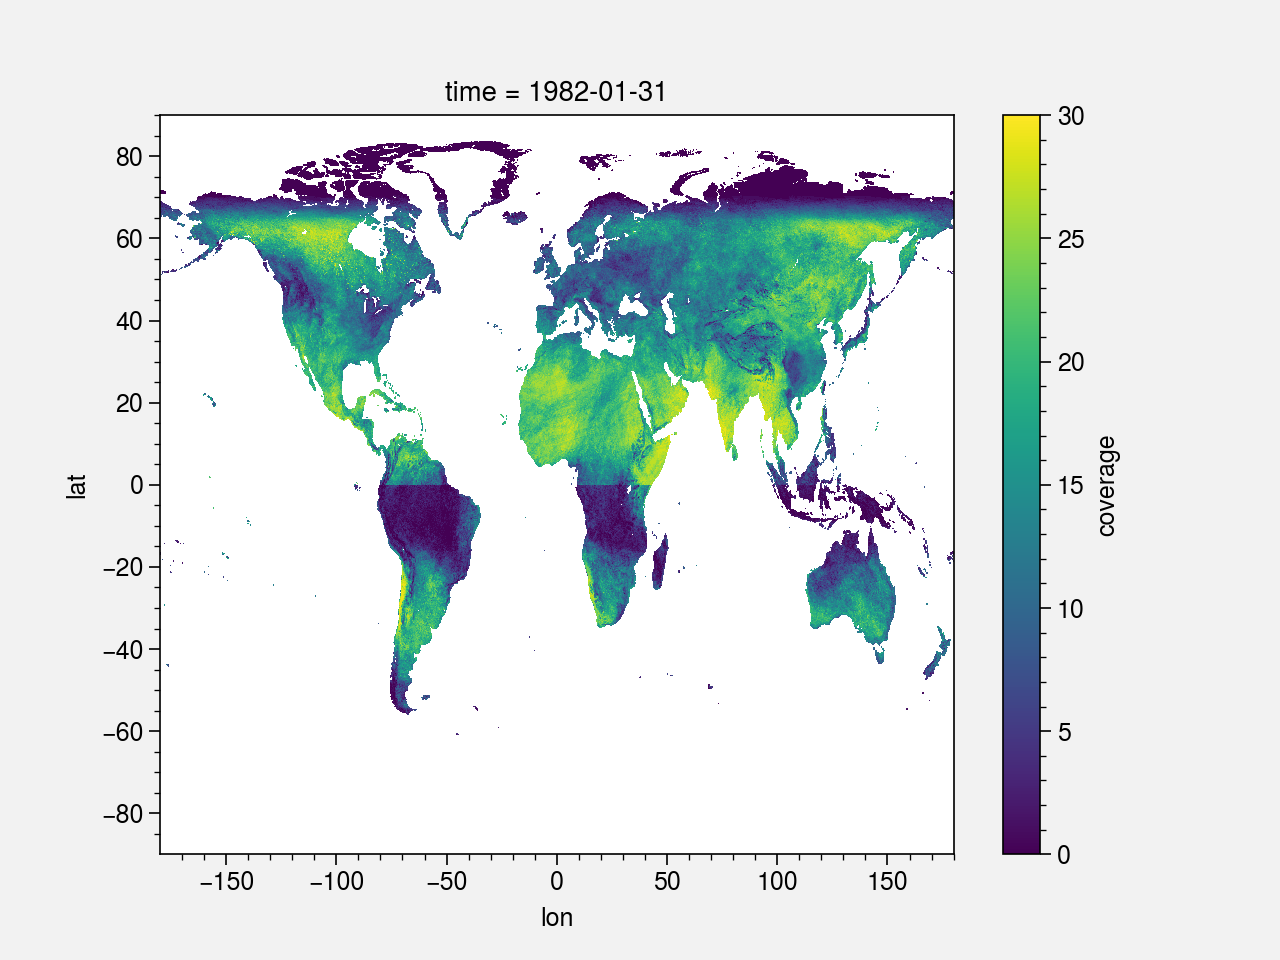

In [18]:
ds.coverage[0].where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215).plot()

In [6]:
coverage = ds.coverage.where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215).weighted(np.cos(np.deg2rad(ds.lat))).mean(('lat','lon'))
coverage.load()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory

KilledWorker: ('open_dataset-07095b2730f49c86835e37581e9dd871coverage-c09c5927c806543c9e57a030312aa58e', <Worker 'tcp://127.0.0.1:33375', name: 1, memory: 0, processing: 76>)

In [17]:
(ds.coverage[0:3].where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215)).mean(('lat','lon')).values

array([13.46362395, 13.41012004, 15.94590137])

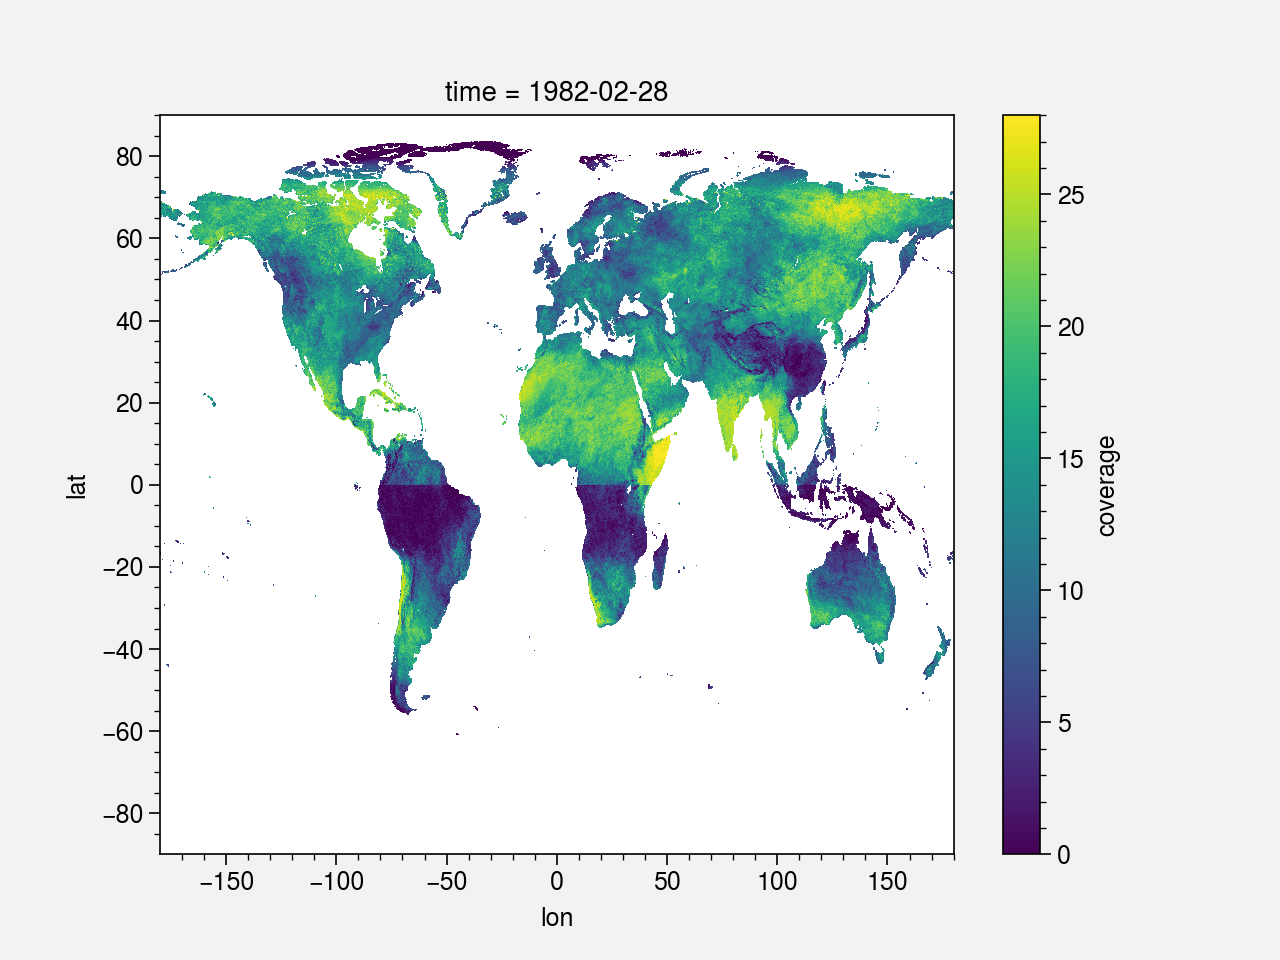

In [16]:
ds.coverage[0:3].where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215)[1].plot()

In [13]:
ds.coverage[0:3].where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215).weighted(np.cos(ds.lat)).mean(('lat','lon')).values

array([ 8.28661372, -9.56729626, 46.61580538])

Peut-être remplacer juste les NaN par 0

In [21]:
u.spatial_average(ds.coverage_interp[0].where(ds.mask_water[0] != 210).where(ds.mask_ice[0] != 215)).values

array(24.27655208)

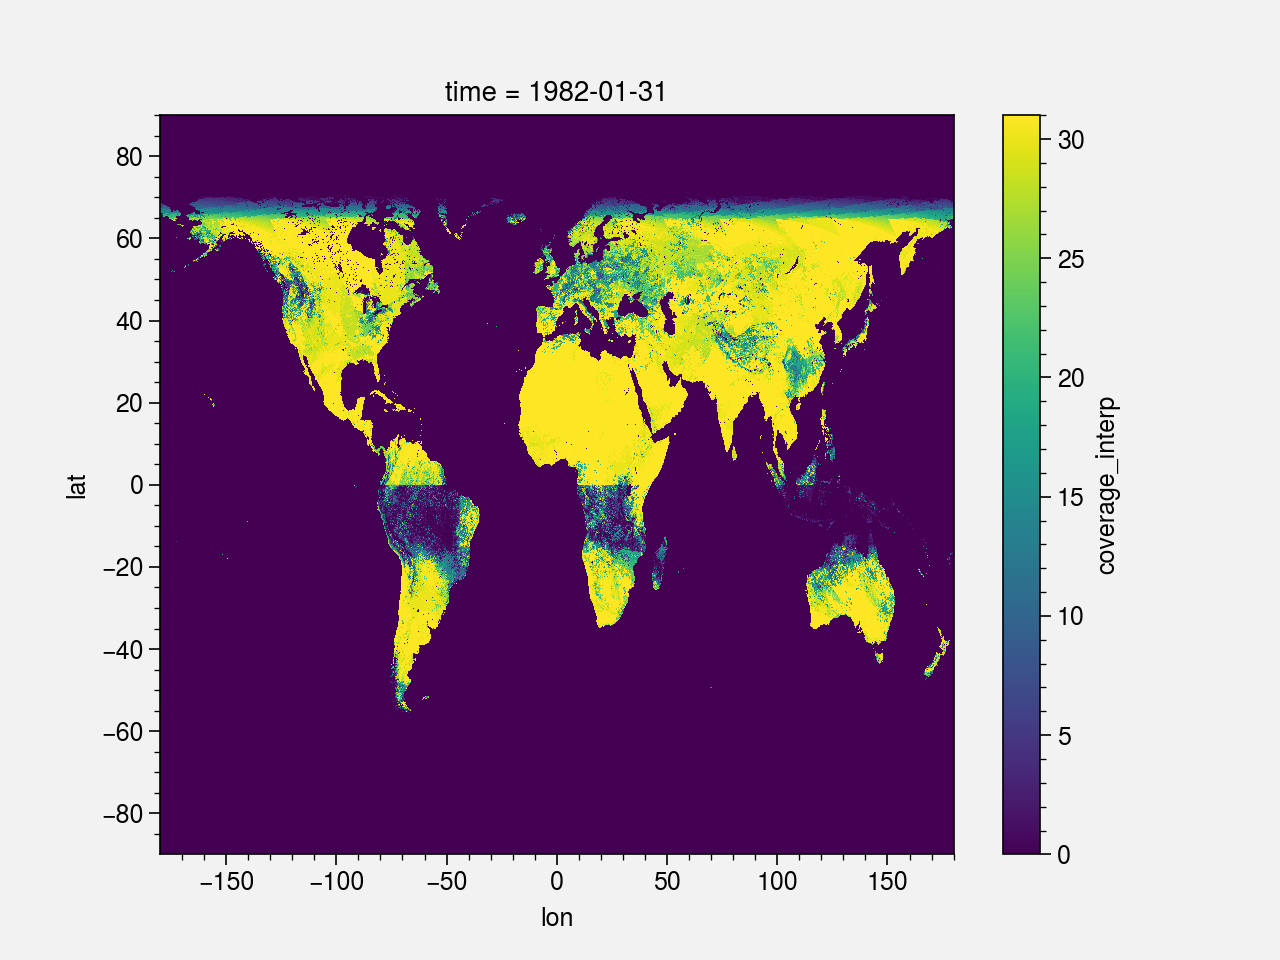

In [10]:
ds.coverage_interp[0].plot()